<a href="https://colab.research.google.com/github/ABBU2712/Open-Source-Kornia/blob/main/Turorial_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%matplotlib inline
!pip install git+https://github.com/kornia/kornia

In [2]:
import kornia
kornia.__version__

/usr/local/lib/python3.7/dist-packages/kornia/augmentation/augmentation.py:1861: DeprecationWarning: GaussianBlur is no longer maintained and will be removed from the future versions. Please use RandomGaussianBlur instead.
  category=DeprecationWarning,


'0.5.4+84a47e6'

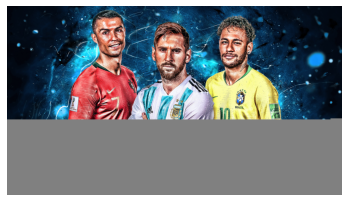

In [3]:
import torch
import kornia
import cv2
import numpy as np

import matplotlib.pyplot as plt

# read the image with OpenCV
img: np.ndarray = cv2.imread('./Fifa.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convert to torch tensor
data: torch.tensor = kornia.image_to_tensor(img, keepdim=False)/255.  # BxCxHxW

plt.axis('off')
plt.imshow(img)
plt.show()

In [4]:
# create the operator
canny = kornia.filters.Canny()

# blur the image
x_magnitude, x_canny = canny(data.float())

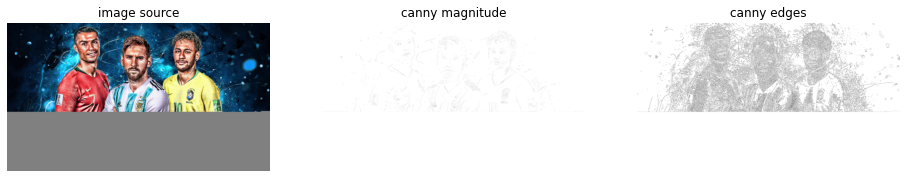

In [5]:
# convert back to numpy
img_magnitude: np.ndarray = kornia.tensor_to_image(x_magnitude.byte())
img_canny: np.ndarray = kornia.tensor_to_image(x_canny.byte())

# Create the plot
fig, axs = plt.subplots(1, 3, figsize=(16,16))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('canny magnitude')
axs[1].imshow(img_magnitude, cmap='Greys')

axs[2].axis('off')
axs[2].set_title('canny edges')
axs[2].imshow(img_canny, cmap='Greys')

plt.show()